## Q1. Install MLflow

To get started with MLflow you'll need to install the MLflow Python package.

For this we recommend creating a separate Python environment, for example, you can use [conda environments](https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html#managing-envs), and then install the package there with `pip` or `conda`.

Once you installed the package, run the command `mlflow --version` and check the output.

What's the version that you have?

In [1]:
import mlflow

In [2]:
mlflow.__version__

'2.12.2'

In [3]:
!mlflow --version

mlflow, version 2.12.2


## ***Answer for Q1:==*** 2.12.2

## Q2. Download and preprocess the data

We'll use the Green Taxi Trip Records dataset to predict the duration of each trip. 

Download the data for January, February and March 2023 in parquet format from [here](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page).

Use the script `preprocess_data.py` located in the folder [`homework`](/home/aleksandr/GitHub/MLOps_zoomcamp/02-experiment-tracking/description_homework) to preprocess the data.

The script will:

* load the data from the folder `<TAXI_DATA_FOLDER>` (the folder where you have downloaded the data),
* fit a `DictVectorizer` on the training set (January 2023 data),
* save the preprocessed datasets and the `DictVectorizer` to disk.

Your task is to download the datasets and then execute this command:

```
python preprocess_data.py --raw_data_path <TAXI_DATA_FOLDER> --dest_path ./output
```

Tip: go to `02-experiment-tracking/homework/` folder before executing the command and change the value of `<TAXI_DATA_FOLDER>` to the location where you saved the data.

How many files were saved to `OUTPUT_FOLDER`?

* 1
* 3
* 4
* 7

In [4]:
!python ./description_homework/preprocess_data.py --raw_data_path ../01-intro/data/ --dest_path ./output

In [5]:
!(cd output/ && ls -a)


.  ..  dv.pkl  test.pkl  train.pkl  val.pkl


## ***Answer for Q2:==*** 4

## Q3. Train a model with autolog

We will train a `RandomForestRegressor` (from Scikit-Learn) on the taxi dataset.

We have prepared the training script `train.py` for this exercise, which can be also found in the folder `homework`. 

The script will:

* load the datasets produced by the previous step,
* train the model on the training set,
* calculate the RMSE score on the validation set.

Your task is to modify the script to enable **autologging** with MLflow, execute the script and then launch the MLflow UI to check that the experiment run was properly tracked. 

Tip 1: don't forget to wrap the training code with a `with mlflow.start_run():` statement as we showed in the videos.

Tip 2: don't modify the hyperparameters of the model to make sure that the training will finish quickly.

What is the value of the `min_samples_split` parameter:

* 2
* 4
* 8
* 10

In [2]:
import os
import sys
sys.path.append(os.path.abspath('./description_homework'))

In [4]:
import importlib
import train
importlib.reload(train)

<module 'train' from '/home/aleksandr/GitHub/MLOps_zoomcamp/02-experiment-tracking/description_homework/train.py'>

In [6]:
# Import class for invoking functions and checking their behavior
from click.testing import CliRunner

# Create runner object to test our train module
runner = CliRunner()

# Run run_train function from train module, emulating command-line execution
result = runner.invoke(train.run_train)

# Print result
print(result.output)

RMSE: 5.431162180141208
Params:
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}



In [9]:
import train_mlflow
importlib.reload(train_mlflow)

<module 'train_mlflow' from '/home/aleksandr/GitHub/MLOps_zoomcamp/02-experiment-tracking/description_homework/train_mlflow.py'>

In [10]:
# Run run_train function from train_mlflow module, emulating command-line execution
result = runner.invoke(train_mlflow.run_train)

# Print result
print(result.output)

Starting experiment green-taxi-experiment-hw2
2024/05/23 21:14:59 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/05/23 21:15:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/aleksandr/anaconda3/envs/exp-track-env/lib/python3.9/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils."
Experiment finished



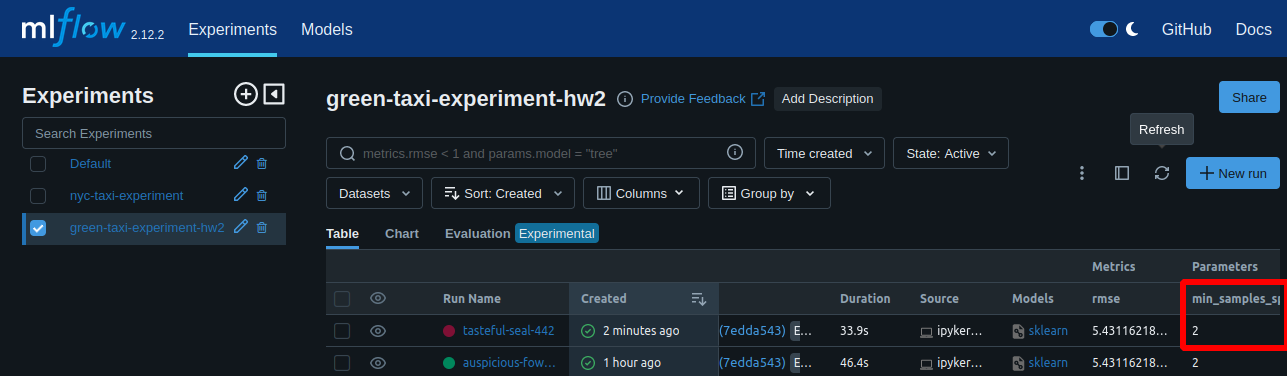

In [17]:
from IPython.display import Image
Image(filename='./screen_shots/screenshot_Q3_hw2.png')

## ***Answer for Q3:==*** 2

## Q4. Launch the tracking server locally

Now we want to manage the entire lifecycle of our ML model. In this step, you'll need to launch a tracking server. This way we will also have access to the model registry. 

Your task is to:

* launch the tracking server on your local machine,
* select a SQLite db for the backend store and a folder called `artifacts` for the artifacts store.

You should keep the tracking server running to work on the next two exercises that use the server.

In addition to `backend-store-uri`, what else do you need to pass to properly configure the server?

* `default-artifact-root`
* `serve-artifacts`
* `artifacts-only`
* `artifacts-destination`

In [12]:
# !mkdir -p ./artifacts

In [13]:
!ls -a

.				mlruns
..				models
artifacts			output
description_homework		read_mlflow_mlruns.ipynb
duration-prediction.ipynb	requirements.txt
hw02-experiment-tracking.ipynb	screen_shots
mlflow.db


In [14]:
# !mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./artifacts

## ***Answer for Q4:==*** default-artifact-root

## Q5. Tune model hyperparameters

Now let's try to reduce the validation error by tuning the hyperparameters of the `RandomForestRegressor` using `hyperopt`. 
We have prepared the script `hpo.py` for this exercise. 

Your task is to modify the script `hpo.py` and make sure that the validation RMSE is logged to the tracking server for each run of the hyperparameter optimization (you will need to add a few lines of code to the `objective` function) and run the script without passing any parameters.

After that, open UI and explore the runs from the experiment called `random-forest-hyperopt` to answer the question below.

Note: Don't use autologging for this exercise.

The idea is to just log the information that you need to answer the question below, including:

* the list of hyperparameters that are passed to the `objective` function during the optimization,
* the RMSE obtained on the validation set (February 2023 data).

What's the best validation RMSE that you got?

* 4.817
* 5.335
* 5.818
* 6.336

In [15]:
import hpo
importlib.reload(hpo)

<module 'hpo' from '/home/aleksandr/GitHub/MLOps_zoomcamp/02-experiment-tracking/description_homework/hpo.py'>

In [16]:
# Run run_optimization function from hpo module, emulating command-line execution
result = runner.invoke(hpo.run_optimization)

# Print result
print(result.output)

100%|██████████| 15/15 [01:57<00:00,  7.80s/trial, best loss: 5.335419588556921]



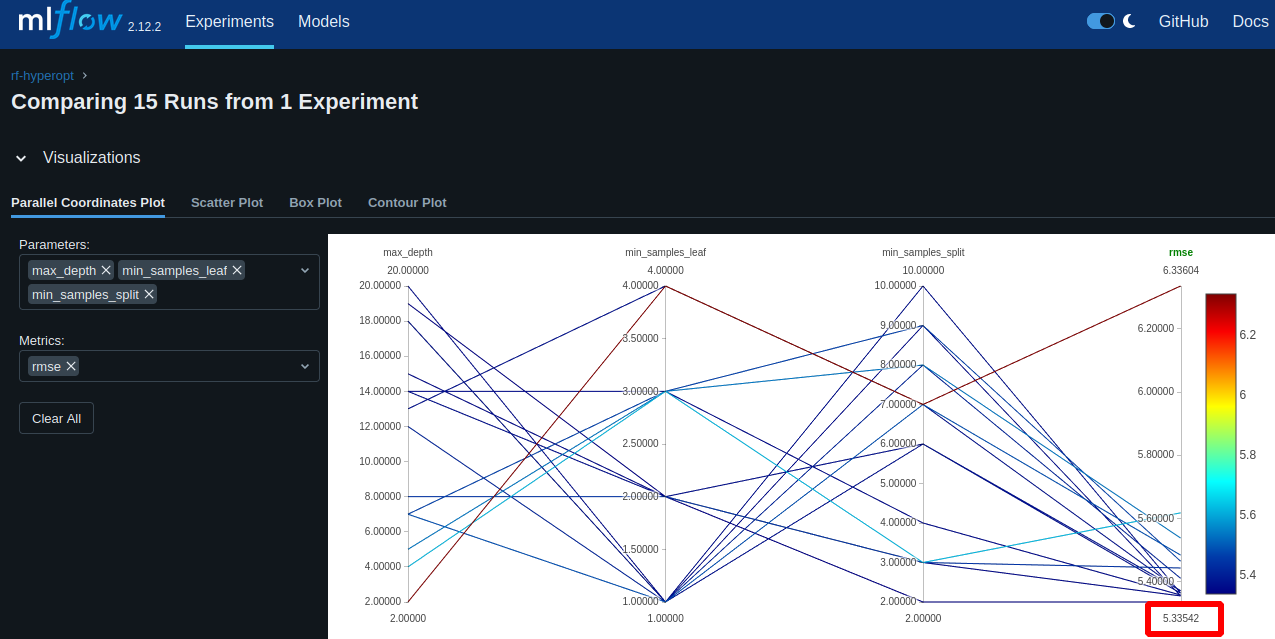

In [17]:
Image(filename='./screen_shots/screenshot_Q5_hw2.png')

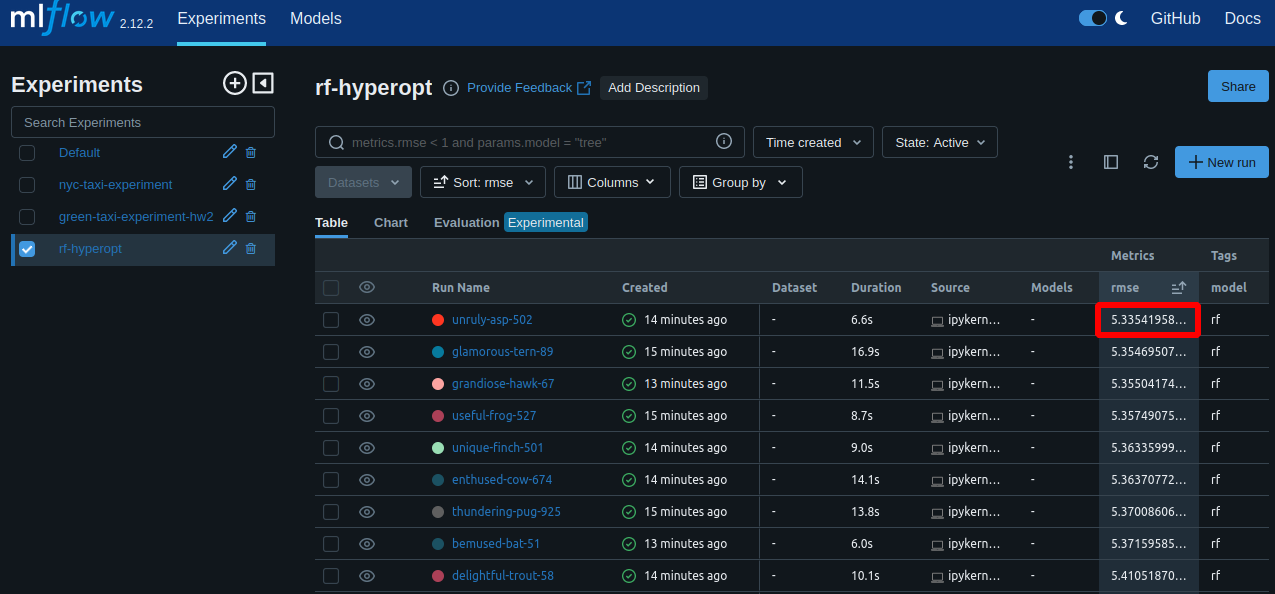

In [18]:
Image(filename='./screen_shots/screenshot_Q5_hw2_2.png')

## ***Answer for Q5:==*** 5.335

## Q6. Promote the best model to the model registry

The results from the hyperparameter optimization are quite good. So, we can assume that we are ready to test some of these models in production. 
In this exercise, you'll promote the best model to the model registry. We have prepared a script called `register_model.py`, which will check the results from the previous step and select the top 5 runs. 
After that, it will calculate the RMSE of those models on the test set (March 2023 data) and save the results to a new experiment called `random-forest-best-models`.

Your task is to update the script `register_model.py` so that it selects the model with the lowest RMSE on the test set and registers it to the model registry.

Tip 1: you can use the method `search_runs` from the `MlflowClient` to get the model with the lowest RMSE,

Tip 2: to register the model you can use the method `mlflow.register_model` and you will need to pass the right `model_uri` in the form of a string that looks like this: `"runs:/<RUN_ID>/model"`, and the name of the model (make sure to choose a good one!).

What is the test RMSE of the best model?

* 5.060
* 5.567
* 6.061
* 6.568

In [8]:
from mlflow.tracking import MlflowClient

MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"

client = MlflowClient(tracking_uri=MLFLOW_TRACKING_URI)

In [14]:
EXPERIMENT_NAME = "rf-hyperopt"
experiment_id = client.get_experiment_by_name(EXPERIMENT_NAME).experiment_id
experiment_id

'3'

In [10]:
from mlflow.entities import ViewType

runs = client.search_runs(
    experiment_ids=experiment_id,
    filter_string="metrics.rmse < 7",
    run_view_type=ViewType.ACTIVE_ONLY,
    order_by=["metrics.rmse ASC"]
)

In [27]:
runs_best_models = []

for run in runs[:5]:
    runs_best_models.append(run)
    print(f"rmse: {run.data.metrics['rmse']:.4f}, "
          f"run id: {run.info.run_id}, "
          f"Run Name: {run.data.tags.get('mlflow.runName')}"
          )

rmse: 5.3354, run id: 7e39810f2b66465d962482128f1b4253, Run Name: illustrious-fly-420
rmse: 5.3547, run id: c1feabf24f8a48158c4f972c50b23197, Run Name: unruly-bee-610
rmse: 5.3550, run id: cbf5ccb5123a4c37bb22c867948a0287, Run Name: overjoyed-shrike-933
rmse: 5.3575, run id: feb67fd554b746c3a12db3c90e4e01b3, Run Name: painted-turtle-345
rmse: 5.3634, run id: 7688b282e6174c74a2e1ad023c703c05, Run Name: clean-skink-555


In [23]:
import os
import pickle

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

RF_PARAMS = ['max_depth', 'n_estimators', 'min_samples_split', 'min_samples_leaf', 'random_state']
DATA_PATH = "./output"

def load_pickle(filename):
    with open(filename, "rb") as f_in:
        return pickle.load(f_in)


def test_validation_best_models(params):
    X_train, y_train = load_pickle(os.path.join(DATA_PATH, "train.pkl"))
    X_val, y_val = load_pickle(os.path.join(DATA_PATH, "val.pkl"))
    X_test, y_test = load_pickle(os.path.join(DATA_PATH, "test.pkl"))

    for param in RF_PARAMS:
        params[param] = int(params[param])

    rf = RandomForestRegressor(**params)
    rf.fit(X_train, y_train)

    # Evaluate model on the validation and test sets
    val_rmse = root_mean_squared_error(y_val, rf.predict(X_val))
    test_rmse = root_mean_squared_error(y_test, rf.predict(X_test))
    
    return val_rmse, test_rmse


In [29]:
for run in runs_best_models:
    val_rmse, test_rmse = test_validation_best_models(params=run.data.params)
    print(f"initial_val_rmse: {run.data.metrics['rmse']:.4f}, "
          f"val_rmse: {val_rmse:.4f}, "
          f"test_rmse: {test_rmse:.4f}")

initial_val_rmse: 5.3354, val_rmse: 5.3354, test_rmse: 5.5674
initial_val_rmse: 5.3547, val_rmse: 5.3547, test_rmse: 5.5853
initial_val_rmse: 5.3550, val_rmse: 5.3550, test_rmse: 5.5921
initial_val_rmse: 5.3575, val_rmse: 5.3575, test_rmse: 5.5895
initial_val_rmse: 5.3634, val_rmse: 5.3634, test_rmse: 5.5942


In [15]:
import register_model
importlib.reload(register_model)

<module 'register_model' from '/home/aleksandr/GitHub/MLOps_zoomcamp/02-experiment-tracking/description_homework/register_model.py'>

In [ ]:
# Run run_register_m
result = runner.invo

# Print result
print(result.output)

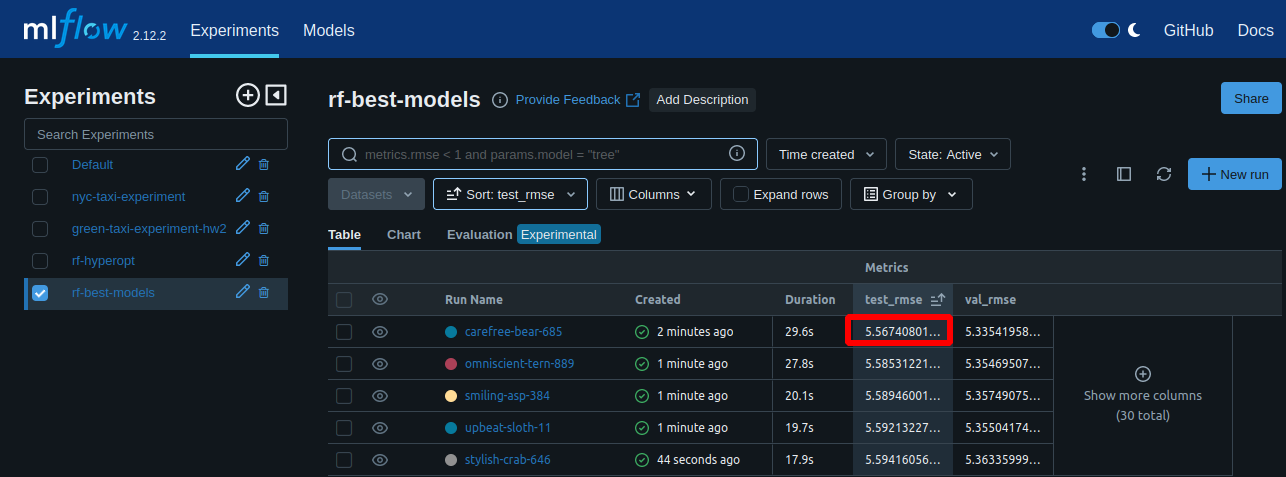

In [19]:
Image(filename='./screen_shots/screenshot_Q6_hw2.png')

## ***Answer for Q6:==*** 5.567

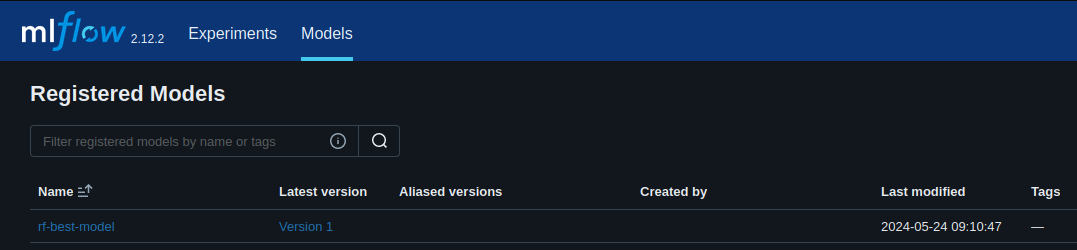

In [20]:
Image(filename='./screen_shots/screenshot_Q6_hw2_2.png')

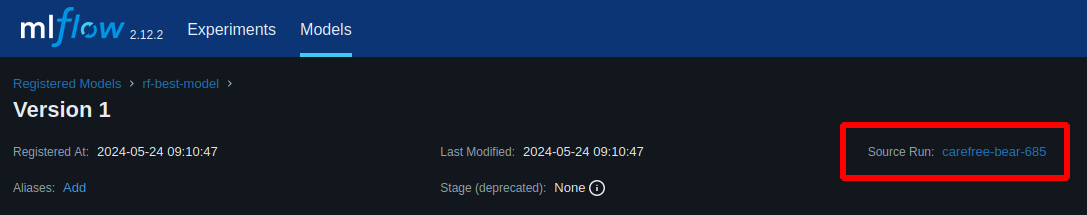

In [21]:
Image(filename='./screen_shots/screenshot_Q6_hw2_3.png')